<a href="https://colab.research.google.com/github/AsadiAhmad/Image-Skeletonizer/blob/main/Code/Image_Skeletonizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Step 1: Import Libraries

In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

# Step 2: Download Pictures

In [2]:
!wget https://raw.githubusercontent.com/AsadiAhmad/Image-Skeletonizer/main/Pictures/hand.jpg -O hand.jpg
!wget https://raw.githubusercontent.com/AsadiAhmad/Image-Skeletonizer/main/Pictures/shark.jpg -O shark.jpg
!wget https://raw.githubusercontent.com/AsadiAhmad/Image-Skeletonizer/main/Pictures/human.jpg -O human.jpg
!wget https://raw.githubusercontent.com/AsadiAhmad/Image-Skeletonizer/main/Pictures/cow.jpg -O cow.jpg

--2025-05-10 17:27:05--  https://raw.githubusercontent.com/AsadiAhmad/Image-Skeletonizer/main/Pictures/hand.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3928 (3.8K) [image/jpeg]
Saving to: ‘hand.jpg’

hand.jpg            100%[===================>]   3.84K  --.-KB/s    in 0s      

2025-05-10 17:27:05 (31.3 MB/s) - ‘hand.jpg’ saved [3928/3928]

--2025-05-10 17:27:05--  https://raw.githubusercontent.com/AsadiAhmad/Image-Skeletonizer/main/Pictures/shark.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3328 (3.2K) [image/jpe

# Step 3: Load Images

In [3]:
hand = cv.imread("hand.jpg", cv.IMREAD_GRAYSCALE)
shark = cv.imread("shark.jpg", cv.IMREAD_GRAYSCALE)
human = cv.imread("human.jpg", cv.IMREAD_GRAYSCALE)
cow = cv.imread("cow.jpg", cv.IMREAD_GRAYSCALE)

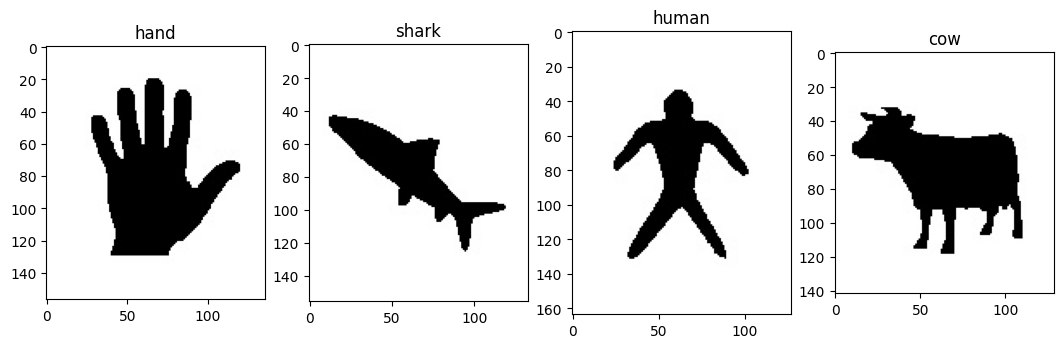

In [4]:
plt.figure(figsize=[13, 6])
plt.subplot(141),plt.imshow(hand, cmap='gray'),plt.title('hand');
plt.subplot(142),plt.imshow(shark, cmap='gray'),plt.title('shark');
plt.subplot(143),plt.imshow(human, cmap='gray'),plt.title('human');
plt.subplot(144),plt.imshow(cow, cmap='gray'),plt.title('cow');
plt.show()

# Step 4: Reverse Images

In [5]:
hand = 255 - hand
shark = 255 - shark
human = 255 - human
cow = 255 - cow

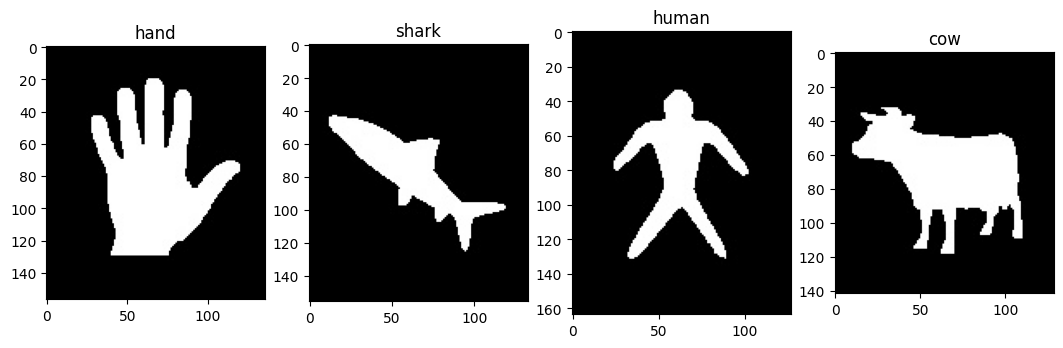

In [6]:
plt.figure(figsize=[13, 6])
plt.subplot(141),plt.imshow(hand, cmap='gray'),plt.title('hand');
plt.subplot(142),plt.imshow(shark, cmap='gray'),plt.title('shark');
plt.subplot(143),plt.imshow(human, cmap='gray'),plt.title('human');
plt.subplot(144),plt.imshow(cow, cmap='gray'),plt.title('cow');
plt.show()

# Step 5: Binarization Image

In [7]:
hand = np.where(hand > 127, 255, 0)
shark = np.where(shark > 127, 255, 0)
human = np.where(human > 127, 255, 0)
cow = np.where(cow > 127, 255, 0)

# Step 6: Transform Grayscale to Binary

In [8]:
hand //= 255
shark //= 255
human //= 255
cow //= 255

# Step 7: Define Kernels

## Corner kernels

In [9]:
nw_kernel = np.array([[-1, -1,  0],
                      [-1,  1,  1],
                      [ 0,  1,  0]], dtype=np.int8)

ne_kernel = np.array([[ 0, -1, -1],
                      [ 1,  1, -1],
                      [ 0,  1,  0]], dtype=np.int8)

se_kernel = np.array([[ 0,  1,  0],
                      [ 1,  1, -1],
                      [ 0, -1, -1]], dtype=np.int8)

sw_kernel = np.array([[ 0,  1,  0],
                      [-1,  1,  1],
                      [-1, -1,  0]], dtype=np.int8)

## Edge kernels

In [10]:
n_kernel = np.array([[-1, -1,  0],
                     [ 1,  1,  0],
                     [ 0,  0,  0]], dtype=np.int8)

e_kernel = np.array([[ 0,  1, -1],
                     [ 0,  1, -1],
                     [ 0,  0,  0]], dtype=np.int8)

s_kernel = np.array([[ 0,  0,  0],
                     [ 0,  1,  1],
                     [ 0, -1, -1]], dtype=np.int8)

w_kernel = np.array([[ 0,  0,  0],
                     [-1,  1,  0],
                     [-1,  1,  0]], dtype=np.int8)

## Dilation and Erosion

In [11]:
big_kernel = np.array([[0, 0, 1, 0, 0],
                       [0, 1, 1, 1, 0],
                       [1, 1, 1, 1, 1],
                       [0, 1, 1, 1, 0],
                       [0, 0, 1, 0, 0]], dtype=np.uint8)

small_kernel = np.array([[1, 1, 1],
                         [1, 1, 1],
                         [1, 1, 1]], dtype=np.uint8)

# Step 8: Calculate Hit or Miss

In [12]:
def calculate_hit_or_miss(image, kernel, condition_sum):
    converted_image = np.where(image == 1, 1, -1).astype(np.int8)
    height, width = converted_image.shape
    matrix = np.zeros((height, width), dtype='int8')
    for i in range(1, height-2):
        for j in range(1, width-2):
            result = converted_image[i-1:i+2, j-1:j+2] * kernel
            result = result.flatten().tolist()
            if sum(result) == condition_sum:
                matrix[i, j] = 1
    return matrix

# Step 9: Edge detection with morphologhy

In [13]:
def edge_detection(image):
    matrix1 = calculate_hit_or_miss(image, nw_kernel, 6)
    matrix2 = calculate_hit_or_miss(image, ne_kernel, 6)
    matrix3 = calculate_hit_or_miss(image, sw_kernel, 6)
    matrix4 = calculate_hit_or_miss(image, se_kernel, 6)
    matrix5 = calculate_hit_or_miss(image, n_kernel, 4)
    matrix6 = calculate_hit_or_miss(image, e_kernel, 4)
    matrix7 = calculate_hit_or_miss(image, s_kernel, 4)
    matrix8 = calculate_hit_or_miss(image, w_kernel, 4)
    matrices_list = [matrix1, matrix2, matrix3, matrix4, matrix5, matrix6, matrix7, matrix8]
    final_matrix = matrices_list[0].copy()

    for mat in matrices_list[1:]:
        final_matrix = np.logical_or(final_matrix, mat)

    final_matrix = final_matrix.astype(np.int8)
    return final_matrix

In [14]:
edge_hand = edge_detection(hand)

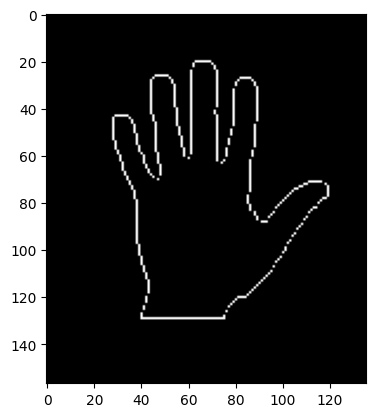

In [15]:
plt.imshow(edge_hand, cmap='gray')

# Step 10: Calculating Erosion

In [16]:
def calculate_erosion(image, kernel):
    condition_sum = np.count_nonzero(kernel == 1)
    height, width = image.shape
    kernel_height, kernel_width = kernel.shape
    kernel_height //= 2
    kernel_width //= 2
    matrix = np.zeros((height, width), dtype='uint8')

    for i in range(kernel_height, height-kernel_height):
        for j in range(kernel_width, width-kernel_width):
            result = image[i-kernel_height:i+kernel_height+1, j-kernel_width:j+kernel_width+1] * kernel
            result = result.flatten().tolist()
            if sum(result) == condition_sum:
                matrix[i, j] = 1
    return matrix

In [17]:
hand_erosion = calculate_erosion(hand, big_kernel)

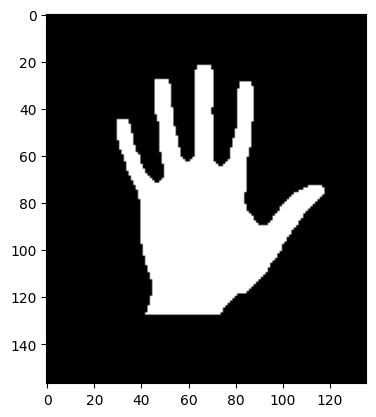

In [18]:
plt.imshow(hand_erosion, cmap='gray')

# Step 11: Calculate Dilation

In [19]:
def calculate_dilation(image, kernel):
    condition_sum = np.count_nonzero(kernel == 1)
    height, width = image.shape
    kernel_height, kernel_width = kernel.shape
    kernel_height //= 2
    kernel_width //= 2
    matrix = np.zeros((height, width), dtype='uint8')

    for i in range(kernel_height, height-kernel_height):
        for j in range(kernel_width, width-kernel_width):
            result = image[i-kernel_height:i+kernel_height+1, j-kernel_width:j+kernel_width+1] * kernel
            result = result.flatten().tolist()
            if sum(result) >= 1:
                matrix[i, j] = 1
    return matrix

In [20]:
hand_dilation = calculate_dilation(hand, big_kernel)

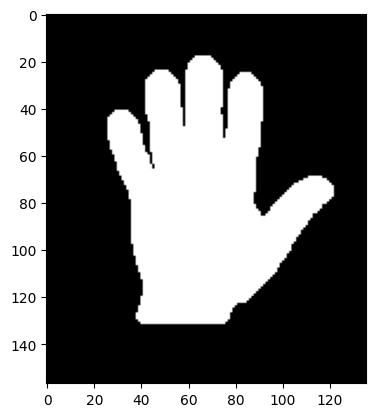

In [21]:
plt.imshow(hand_dilation, cmap='gray')

# Step 12: Calculate Skeleton

In [22]:
def calculate_skeleton(image, kernel, iterations):
    all_matrices = []
    current_image = image.copy()

    for _ in range(iterations):
        eroded = calculate_erosion(current_image, kernel)
        edge = edge_detection(current_image)
        skeleton_part = edge
        all_matrices.append(skeleton_part)
        current_image = eroded

        if not np.any(current_image):
            break

    final_matrix = all_matrices[2].copy()
    for idx, mat in enumerate(all_matrices[1:], start=1):
        if (idx + 3) % 5 == 0:
            final_matrix = np.logical_or(final_matrix, mat)


    return final_matrix.astype(np.uint8)

In [23]:
hand_skeleton = calculate_skeleton(hand, big_kernel, iterations=18)
shark_skeleton = calculate_skeleton(shark, big_kernel, iterations=18)
human_skeleton = calculate_skeleton(human, big_kernel, iterations=18)
cow_skeleton = calculate_skeleton(cow, big_kernel, iterations=18)

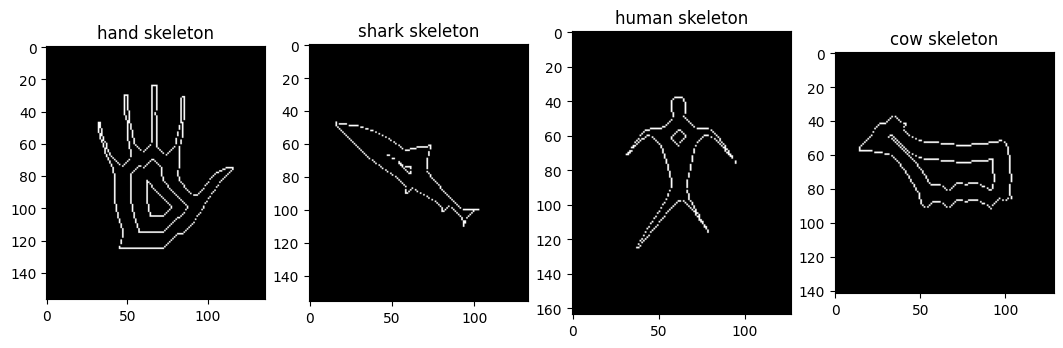

In [24]:
plt.figure(figsize=[13, 6])
plt.subplot(141),plt.imshow(hand_skeleton, cmap='gray'),plt.title('hand skeleton');
plt.subplot(142),plt.imshow(shark_skeleton, cmap='gray'),plt.title('shark skeleton');
plt.subplot(143),plt.imshow(human_skeleton, cmap='gray'),plt.title('human skeleton');
plt.subplot(144),plt.imshow(cow_skeleton, cmap='gray'),plt.title('cow skeleton');
plt.show()

# Step 13: Refill Skeleton

In [25]:
def refill_skeleton(skeleton, big_kernel, small_kernel):
    result1 = calculate_dilation(skeleton, big_kernel)
    result2 = calculate_dilation(result1, big_kernel)
    result3 = calculate_dilation(result2, small_kernel)
    return result3

In [26]:
hand_filled = refill_skeleton(hand_skeleton, big_kernel, small_kernel)
shark_filled = refill_skeleton(shark_skeleton, big_kernel, small_kernel)
human_filled = refill_skeleton(human_skeleton, big_kernel, small_kernel)
cow_filled = refill_skeleton(cow_skeleton, big_kernel, small_kernel)

# Step 14: Transform Binary to Grayscale

In [27]:
hand_filled *= 255
shark_filled *= 255
human_filled *= 255
cow_filled *= 255

# Step 15: Inverse Images

In [28]:
hand_filled = 255 - hand_filled
shark_filled = 255 - shark_filled
human_filled = 255 - human_filled
cow_filled = 255 - cow_filled

# Step 16: Show Refilled Images

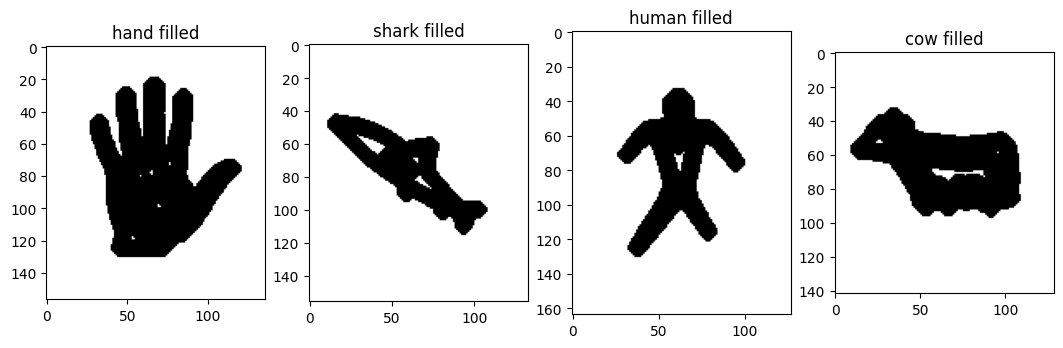

In [29]:
plt.figure(figsize=[13, 6])
plt.subplot(141),plt.imshow(hand_filled, cmap='gray'),plt.title('hand filled');
plt.subplot(142),plt.imshow(shark_filled, cmap='gray'),plt.title('shark filled');
plt.subplot(143),plt.imshow(human_filled, cmap='gray'),plt.title('human filled');
plt.subplot(144),plt.imshow(cow_filled, cmap='gray'),plt.title('cow filled');
plt.show()